A notebook to test reading in ROSETTA radar matfiles and calculating ice thickness

For use with NASA COMBINED (hydrostatic appx and ice densities)

In [72]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from scipy.io import loadmat

import geopandas as gpd
import rasterio

    
%load_ext autoreload
%autoreload 2
pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
## Kluge for now (shouldn't use sys append)
import sys
sys.path.append("/Users/dporter/Documents/Research/Projects/nasa_combined")

from nasa_combined.config import data_dir, data_path, cIce, cAir 

from nasa_combined.custom_funcs import read_DICE_matfile, print_raster

print(data_path)

/Users/dporter/data/Antarctic/ROSETTA/radar


# Read in matfile from local data directory

## Point to File

In [73]:
suffix = '.mat'
datafile = 'AN02_F1005_1usCh1_20151116_094349_23_Picks'

matfile = os.path.join(data_path, datafile + suffix)
print(matfile)

/Users/dporter/data/Antarctic/ROSETTA/radar/AN02_F1005_1usCh1_20151116_094349_23_Picks.mat


## Load into Pandas dataframe

In [75]:
df = read_DICE_matfile(matfile)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GPS_time    1832 non-null   float64
 1   Time        2863 non-null   float64
 2   EPSG_X      1832 non-null   float64
 3   EPSG_Y      1832 non-null   float64
 4   lat         1832 non-null   float64
 5   lon         1832 non-null   float64
 6   PickTime    1832 non-null   float64
 7   SurfTime    1832 non-null   float64
 8   FlightElev  1832 non-null   float64
 9   Surf_elev   1832 non-null   float64
 10  Depth       1832 non-null   float64
 11  Bright      1832 non-null   float64
 12  Distance    1832 non-null   float64
 13  PickDepth   1832 non-null   float64
 14  SurfDepth   1832 non-null   float64
dtypes: float64(15)
memory usage: 335.6 KB
None


In [76]:
df.describe()

,GPS_time,Time,EPSG_X,EPSG_Y,lat,lon,PickTime,SurfTime,FlightElev,Surf_elev,Depth,Bright,Distance,PickDepth,SurfDepth
count,1.832000e+03,2863.000000,1832.000000,1.832000e+03,1832.000000,1832.000000,1.832000e+03,1.832000e+03,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000
mean,1.447667e+09,0.000007,-197840.868979,-1.160285e+06,-79.197935,-170.323947,4.283184e-06,5.063788e-06,763.579631,4.011452,-359.787411,6.240335,13.568503,-359.787495,759.042704
std,8.667090e+01,0.000006,7877.926040,3.355039e+00,0.012058,0.378042,1.157510e-07,1.843761e-08,2.339615,1.352736,9.719671,9.224348,7.877955,9.723088,2.763728
min,1.447667e+09,-0.000002,-211492.195529,-1.160291e+06,-79.218246,-170.975883,4.032342e-06,5.015930e-06,755.874000,0.928103,-371.116853,-29.850918,0.000000,-371.200628,751.868997
25%,1.447667e+09,0.000003,-204669.237553,-1.160288e+06,-79.208441,-170.651950,4.192374e-06,5.049236e-06,762.492150,2.957454,-367.250313,4.112635,6.731501,-367.279409,756.861487
50%,1.447667e+09,0.000007,-197826.069550,-1.160284e+06,-79.198223,-170.324204,4.339061e-06,5.069220e-06,763.640480,4.340064,-364.687970,9.015398,13.553698,-364.481129,759.856981
75%,1.447667e+09,0.000012,-191003.890236,-1.160282e+06,-79.187534,-169.996168,4.372374e-06,5.075881e-06,765.251150,5.077680,-352.053219,12.012263,20.396888,-352.159435,760.855479
max,1.447667e+09,0.000017,-184272.409027,-1.160279e+06,-79.176583,-169.669706,4.419055e-06,5.102526e-06,768.396000,6.594007,-338.705679,19.159244,27.219904,-338.716725,764.849472


### Quick diagnostic plots using Pandas in-built plotting

Text(0.5, 0.98, 'Spatial Variables')

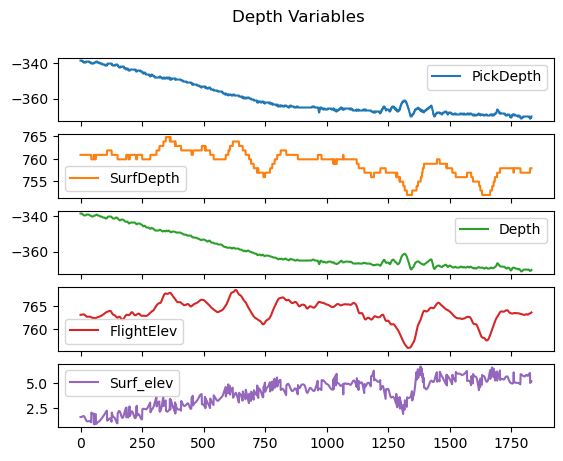

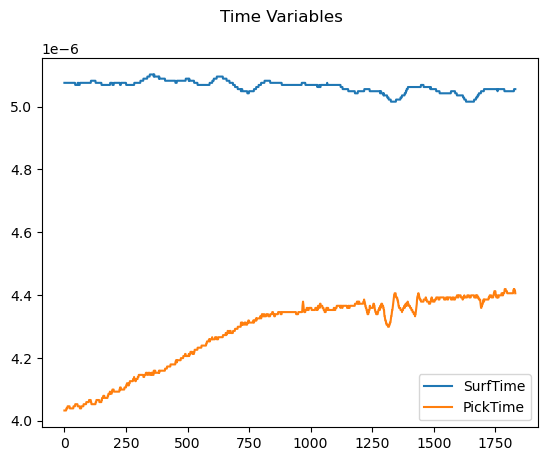

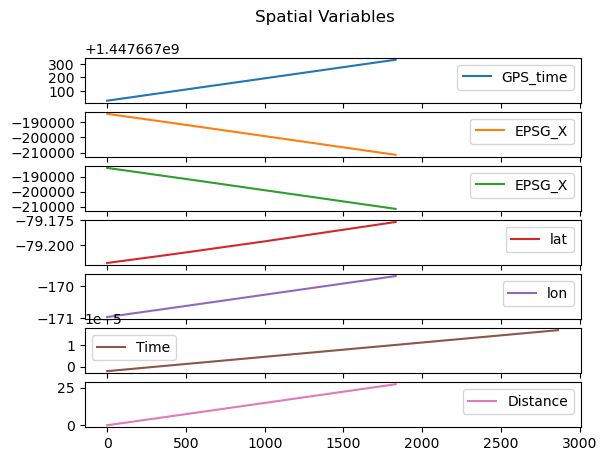

In [80]:
depth_vars = ['PickDepth', 'SurfDepth', 'Depth', 'FlightElev', 'Surf_elev']
df[depth_vars].plot(subplots=True)
plt.suptitle('Depth Variables')

time_vars = ['SurfTime', 'PickTime']
df[time_vars].plot(subplots=False)
plt.suptitle('Time Variables')

spatial_vars = ['GPS_time', 'EPSG_X', 'EPSG_X', 'lat', 'lon', 'Time', 'Distance']
df[spatial_vars].plot(subplots=True)
plt.suptitle('Spatial Variables')

### Plot `derived` thickness to make sure I'm interpretting variables correction

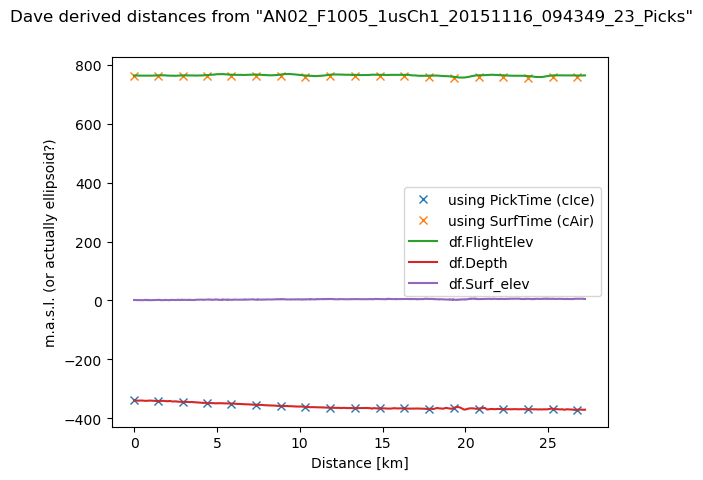

In [93]:
plt.plot(df.Distance[::100], df.PickDepth[::100], 
         ls='', marker='x', label='using PickTime (cIce)')
plt.plot(df.Distance[::100], df.SurfDepth[::100], 
         ls='', marker='x', label='using SurfTime (cAir)')
plt.plot(df.Distance, df.FlightElev, label='df.FlightElev')
plt.plot(df.Distance, df.Depth, label='df.Depth')
plt.plot(df.Distance, df.Surf_elev, label='df.Surf_elev')
plt.suptitle(f'Dave derived distances from "{datafile}"')
plt.xlabel('Distance [km]')
plt.ylabel('m.a.s.l. (or actually ellipsoid?)')
plt.legend()
plt.savefig(f'figs/test_read_ROSETTA_radar-matfiles_DICE.png')

### compare derived and mat-file ranges

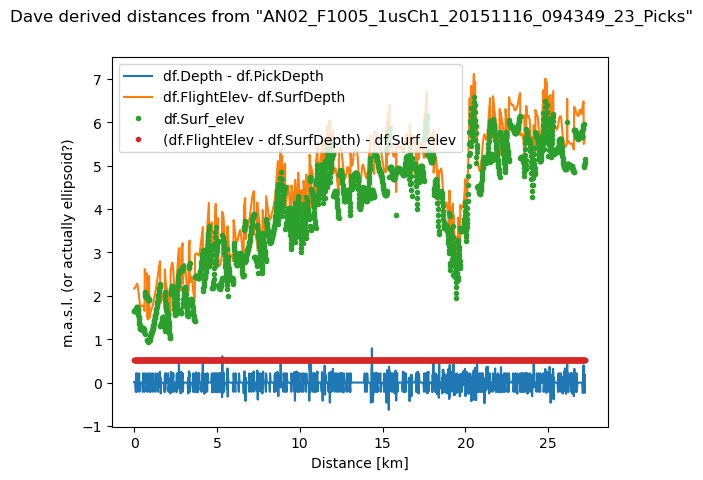

In [107]:
plt.plot(df.Distance, (df.Depth - df.PickDepth), 
         ls='-', marker='', label='df.Depth - df.PickDepth')
plt.plot(df.Distance, (df.FlightElev - df.SurfDepth), 
         ls='-', marker='', label='df.FlightElev- df.SurfDepth')
plt.plot(df.Distance, df.Surf_elev, 
         ls='', marker='.', label='df.Surf_elev')
plt.plot(df.Distance, (df.FlightElev - df.SurfDepth) - df.Surf_elev, 
         ls='', marker='.', label='(df.FlightElev - df.SurfDepth) - df.Surf_elev')
plt.suptitle(f'Dave derived distances from "{datafile}"')
plt.xlabel('Distance [km]')
plt.ylabel('m.a.s.l. (or actually ellipsoid?)')
plt.legend()
plt.savefig(f'figs/compare_DICE_calc-ranges.png')

### Overplot Brightness to show alignement with basal features

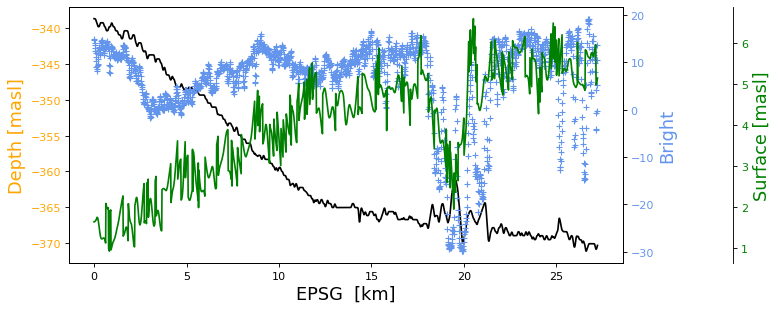

In [96]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

# ax.plot(df.EPSG_X, df.Surf_elev, color='orange')
ax.plot(df.Distance, df.Depth, color='black')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_ylabel('Depth [masl]', color='orange', fontsize=16)
ax.set_xlabel('EPSG  [km]', color='black', fontsize=16)
# add_basin_locs()

ax2 = ax.twinx()
ax2.plot(df.Distance, df.Bright, color='cornflowerblue', ls='', marker='+')
ax2.tick_params(axis='y', labelcolor='cornflowerblue')
ax2.set_ylabel('Bright', color='cornflowerblue', fontsize=16)

ax3 = ax.twinx()
ax3.plot(df.Distance, df.Surf_elev, color='green', ls='-', marker='')
ax3.tick_params(axis='y', labelcolor='green')
ax3.set_ylabel('Surface [masl]', color='green', fontsize=16)
ax3.spines['right'].set_position(('axes', 1.2))

plt.tight_layout()
# plt.savefig('figs/lineplot_UTG_sample_ClassBeta.png')

## Convert to GeoPandas `dataframe`

In [38]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.EPSG_X, df.EPSG_Y)
)

<AxesSubplot: >

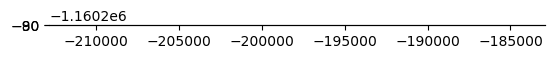

In [39]:
gdf.plot()

## Read in Antarctica catchments shapefile for plotting

In [40]:
## fix PROJ path
import pyproj

projpath = sys.prefix + '/share/proj'
pyproj.datadir.set_data_dir(projpath)

In [44]:
# data/ASE_catchments_matchGL.geojson
# data/ASE_GroundingLine_simple.geojson

outlines = '../data/external/ASE_catchments+GL_3031.shp'

shapefile = gpd.read_file(outlines)

shapefile.head()

,groundedic,grounded_1,geometry
0,Grounded,GR,"POLYGON ((-1608074.997 -638549.999, -1608123.7..."
1,Grounded,GR,"POLYGON ((-1739481.254 -401608.850, -1740262.4..."
2,Grounded,GR,"POLYGON ((-1609325.000 -722675.000, -1609325.0..."
3,Grounded,GR,"MULTIPOLYGON (((-1604824.996 -612051.692, -160..."
4,Grounded,GR,"POLYGON ((-1908272.291 -410339.703, -1908540.1..."


(-1300000.0, -900000.0)

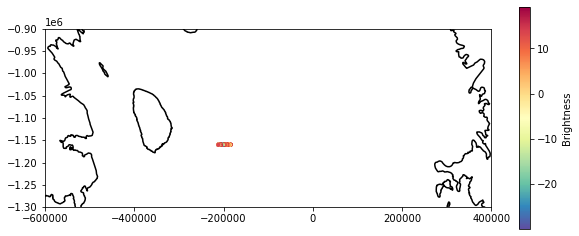

In [50]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=72)  # figsize=(8, 8), 
ax.set_aspect('equal')

shapefile.boundary.plot(ax=ax, edgecolor='black')

plt.scatter(df.EPSG_X, df.EPSG_Y, c=df.Bright,
            # vmin=60, vmax=600,
            marker='.',
            cmap="Spectral_r",
           )
plt.colorbar(label="Brightness")

# plt.scatter(df_ASE.X, df_ASE.Y, c=y_pred_ASE, 
#             marker='.',
#             cmap=cmap, edgecolors=None)
# plt.scatter(line.X_EPSG_3031[::500], line.Y_EPSG_3031[::500], 
#             c='black',
#             marker='.',
#             cmap=cmap, edgecolors=None,
#             )

plt.xlim(-0.6e6, 0.4e6)
plt.ylim(-1.3e6, -0.9e6)

# plt.savefig('figs/mapplot_ASE_ypred_antgg.png')
